MIT License

Copyright (c) 2021 Taiki Miyagawa and Akinori F. Ebihara

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# HMDB51 Statistics
* Num of total videos: 6766
* Num of total frames: 632665
* Max num of frames in a video: 1062
* Min num of frames in a video: 18
* Long videos (descending order):

['/data/t-miyagawa/HMDB51png/pour/How_to_pour_beer_pour_u_nm_np1_fr_goo_0'

'/data/t-miyagawa/HMDB51png/pour/How_to_pour_beer__eh__pour_u_nm_np1_fr_goo_0'

'/data/t-miyagawa/HMDB51png/talk/jonhs_netfreemovies_holygrail_talk_h_nm_np1_fr_med_6'

'/data/t-miyagawa/HMDB51png/throw/baseballpitchslowmotion_throw_f_nm_np1_fr_med_0'

'/data/t-miyagawa/HMDB51png/climb/Bristol_UCR_roof_climb_climb_f_cm_np1_ba_bad_0']

Num of frames: [1062, 1062, 846, 741, 728]

* Short videos (ascending order):

['/data/t-miyagawa/HMDB51png/somersault/LONGESTYARD_somersault_f_cm_np1_le_bad_27'

'/data/t-miyagawa/HMDB51png/drink/BLACK_HAWK_DOWN_drink_h_nm_np1_fr_bad_36'

'/data/t-miyagawa/HMDB51png/run/likebeckam_run_f_cm_np1_le_med_3'

'/data/t-miyagawa/HMDB51png/run/likebeckam_run_f_cm_np1_ri_med_1'

'/data/t-miyagawa/HMDB51png/run/BLACK_HAWK_DOWN_run_l_nm_np1_ba_med_16']

Num of frames: [18, 21, 21, 21, 21]

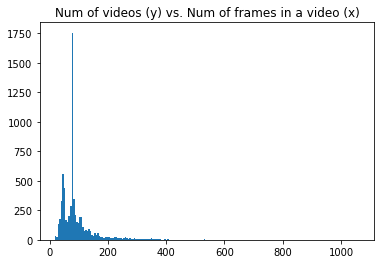

### Naming Rules of Label Texts
<font color=red>`glob` does not work for "[" or "]". Use "[[]" and "[]]" instead. 
    `path.replace("[", "[[").replace("]", "[]]").replace("[[", "[[]")` does a good job.</font>

```
#####################################
## Naming rules in label text file ##
#####################################
There are totally 153 files in this folder,
[action]_test_split[1-3].txt  corresponding to three splits reported in the paper.
The format of each file is
[video_name] [id]
The video is included in the training set if id is 1
The video is included in the testing set if id is 2
The video is not included for training/testing if id is 0
There should be 70 videos with id 1 , 30 videos with id 2 in each txt file.

PROPERTY                                   LABELS (ABBREVIATION)
visible body parts                         head(h), upper body(u), full body (f), lower body(l)
camera motion                              motion (cm), static (nm)
number of people involved in the action    Single (np1), two (np2), three (np3)
camera viewpoint                           Front (fr), back (ba), left(le), right(ri)
video quality                              good (goo), medium (med), ok (bad)


####################################
#########    Templates   ###########
####################################
label file names:
ClassName_test_split[1-3].txt

video names:
VideoName_ClassName_VisibleBodyParts_CameraMotion_NumberOfPeopleInvolvedInTheAction_CameraViewpoint_VideoQuality_Number\
.avi ID


####################################
#### Examples in class "smile" #####
####################################
my_smile_smile_h_cm_np1_fr_goo_0.avi 1
prelinger_LetsPlay1949_smile_h_nm_np1_fr_goo_27.avi 2
prelinger_LetsPlay1949_smile_h_nm_np1_le_goo_25.avi 2
prelinger_LetsPlay1949_smile_u_nm_np1_fr_med_24.avi 0
prelinger_LetsPlay1949_smile_u_nm_np1_ri_med_21.avi 2
prelinger_they_grow_up_so_fast_1_smile_u_nm_np1_fr_med_0.avi 1
show_your_smile_-)_smile_h_nm_np1_fr_med_0.avi 1
showyoursmile_smile_h_nm_np1_fr_goo_0.avi 1
smile_collection_7_smile_h_nm_np1_fr_goo_0.avi 1
smile_collection_7_smile_h_nm_np1_fr_goo_1.avi 1
youtube_smile_response_smile_h_nm_np1_fr_goo_0.avi 1
```

## Get statistical information

In [1]:
from glob import glob
import os
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
DATADIR = "Define this first. E.g., /data/t-miyagawa"

In [78]:
# Get videodir and numf
datadir = "{}/HMDB51png".format(DATADIR)
classdir = sorted(glob(datadir + "/*"))
classdir = [i + "/" for i in classdir]
classnames = [i[i.rfind("HMDB51png/") + 10 : -1] for i in classdir]
videodir = {
    k : 
    sorted(glob([v for v in classdir if v.find("/" + k + "/") != -1][0] + "/*"))
    for k in classnames}

numf = dict()
for k in classnames:
    v1 = videodir[k]
    v2 = [i.replace("[", "[[").replace("]", "[]]").replace("[[", "[[]") for i in v1]
    numf[k] = [len(glob(_video + "/*.png")) for _video in v2]

#videodir, numf # path to video directories, num of frames for each

In [79]:
# Smear the keys
numf_concat = []
for k in classnames:
    v = numf[k]
    numf_concat.extend(v)

videodir_concat = []
for k in classnames:
    v = videodir[k]
    videodir_concat.extend(v)
    
# Classwise num of frames
numf_classwise = []
for k in classnames:
    v = numf[k]
    v = sum(v)
    numf_classwise.append(v)
    
# Classwise num of videos (clips)
numv_classwise = []
for k in classnames:
    v = videodir[k]
    v = len(v)
    numv_classwise.append(v)
    
# Classwise num of unique videos (groups)
numuv_classwise = []
for k in classnames:
    v1 = videodir[k]
        # ['DATADIR/HMDB51png/wave/20060723sfjffbartsinger_wave_f_cm_np1_ba_med_0',
        #  'DATADIR/HMDB51png/wave/21_wave_u_nm_np1_fr_goo_5',
        #  'DATADIR/HMDB51png/wave/50_FIRST_DATES_wave_f_cm_np1_fr_med_0',
        #  'DATADIR/HMDB51png/wave/50_FIRST_DATES_wave_u_cm_np1_fr_goo_30',
        #  'DATADIR/HMDB51png/wave/50_FIRST_DATES_wave_u_cm_np1_fr_med_1',
        #  'DATADIR/HMDB51png/wave/50_FIRST_DATES_wave_u_cm_np1_fr_med_36',
    v2 = [i[i.rfind("/")+1:] for i in v1]
        # ['20060723sfjffbartsinger_wave_f_cm_np1_ba_med_0',
        #  '21_wave_u_nm_np1_fr_goo_5',
        #  '50_FIRST_DATES_wave_f_cm_np1_fr_med_0',
        #  '50_FIRST_DATES_wave_u_cm_np1_fr_goo_30',
        #  '50_FIRST_DATES_wave_u_cm_np1_fr_med_1',
        #  '50_FIRST_DATES_wave_u_cm_np1_fr_med_36',
    v3 = [i[:i.rfind(k)-1] for i in v2]
        # ['20060723sfjffbartsinger',
        #  '21',
        #  '50_FIRST_DATES',
        #  '50_FIRST_DATES',
        #  '50_FIRST_DATES',
        #  '50_FIRST_DATES',
    v4 = []
    for i in v3:
        if not i in v4:
            v4.append(i)
        # ['20060723sfjffbartsinger',
        #  '21',
        #  '50_FIRST_DATES',
    numuv_classwise.append(len(v4))

In [46]:
# Returns:
#     classnames: List. Len = Num of classes. Names of classes in alphabetical order.
#
#     videodir: Dict. Paths to video directories. Each values (paths) are in alphabetical order of video names.
#     numf: Dict. Num of frames for each videos. Each values (integers) are in alphabetical order of video names.
#
#     numf_concat: List. Len = Num of total videos. Order is the same as `videoddir_concat`.
#     videodir_concat: List. Len = Num of total videos. Order is the same as `numf_concat`.
#
#     numf_classwise: List. Len = Num of classes. The classwise numbers of frames in alphabetical order of class names.
#     numv_classwise: List. Len = Num of classes. The classwise numbers of videos (clips) in alphabetical order of class names.
#     numuv_classwise: List. Len = Num of classes. The classwise numbers of unique videos (groups) in alphabetical order of class names.

## Statistics

In [81]:
print("* Num of total videos: {}".format(len(numf_concat)))
print("* Num of total frames: {}".format(sum(numf_concat)))
print("* Max num of frames in a video: {}".format(max(numf_concat)))
print("* Min num of frames in a video: {}".format(min(numf_concat)))

_numshow = 5
print("* Long videos (descending order):\n{}".format(np.array(videodir_concat)[np.argsort(numf_concat)[-_numshow:][::-1]]))
print("Num of frames:\n{}".format(sorted(numf_concat)[-_numshow:][::-1]))
print("\n* Short videos (ascending order):\n{}".format(np.array(videodir_concat)[np.argsort(numf_concat)[:_numshow]]))
print("Num of frames:\n{}".format(sorted(numf_concat)[:_numshow]))

* Num of total videos: 6766
* Num of total frames: 632665
* Max num of frames in a video: 1062
* Min num of frames in a video: 18
* Long videos (descending order):
['/data/t-miyagawa/HMDB51png/pour/How_to_pour_beer_pour_u_nm_np1_fr_goo_0'
 '/data/t-miyagawa/HMDB51png/pour/How_to_pour_beer__eh__pour_u_nm_np1_fr_goo_0'
 '/data/t-miyagawa/HMDB51png/talk/jonhs_netfreemovies_holygrail_talk_h_nm_np1_fr_med_6'
 '/data/t-miyagawa/HMDB51png/throw/baseballpitchslowmotion_throw_f_nm_np1_fr_med_0'
 '/data/t-miyagawa/HMDB51png/climb/Bristol_UCR_roof_climb_climb_f_cm_np1_ba_bad_0']
Num of frames:
[1062, 1062, 846, 741, 728]

* Short videos (ascending order):
['/data/t-miyagawa/HMDB51png/somersault/LONGESTYARD_somersault_f_cm_np1_le_bad_27'
 '/data/t-miyagawa/HMDB51png/drink/BLACK_HAWK_DOWN_drink_h_nm_np1_fr_bad_36'
 '/data/t-miyagawa/HMDB51png/run/likebeckam_run_f_cm_np1_le_med_3'
 '/data/t-miyagawa/HMDB51png/run/likebeckam_run_f_cm_np1_ri_med_1'
 '/data/t-miyagawa/HMDB51png/run/BLACK_HAWK_DOWN_run_

(array([3.000e+01, 2.600e+01, 1.370e+02, 1.740e+02, 3.330e+02, 5.550e+02,
        4.380e+02, 1.690e+02, 1.500e+02, 2.020e+02, 2.840e+02, 1.755e+03,
        3.460e+02, 2.060e+02, 1.530e+02, 1.440e+02, 1.900e+02, 1.890e+02,
        1.050e+02, 7.300e+01, 8.500e+01, 7.500e+01, 8.800e+01, 7.400e+01,
        4.300e+01, 3.400e+01, 5.400e+01, 3.700e+01, 5.500e+01, 2.900e+01,
        2.300e+01, 2.600e+01, 1.900e+01, 2.700e+01, 2.500e+01, 2.600e+01,
        1.800e+01, 1.700e+01, 1.300e+01, 2.000e+01, 2.000e+01, 1.300e+01,
        1.500e+01, 1.200e+01, 7.000e+00, 1.700e+01, 2.100e+01, 1.200e+01,
        4.000e+00, 1.400e+01, 9.000e+00, 7.000e+00, 1.300e+01, 4.000e+00,
        6.000e+00, 9.000e+00, 8.000e+00, 4.000e+00, 5.000e+00, 7.000e+00,
        7.000e+00, 6.000e+00, 3.000e+00, 1.200e+01, 3.000e+00, 5.000e+00,
        3.000e+00, 3.000e+00, 6.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 2.000e+0

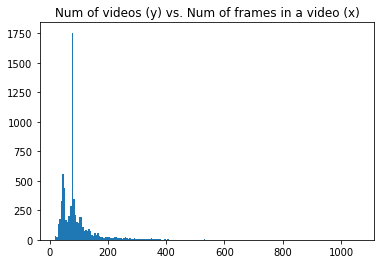

In [84]:
plt.title("Num of videos (y) vs. Num of frames in a video (x)")
#plt.yscale("log")
plt.hist(numf_concat, bins=200)

In [85]:
print("Mean: {}".format(statistics.mean(numf_concat)))
print("Median: {}".format(statistics.median(numf_concat)))
print("Mode: {}".format(statistics.mode(numf_concat)))

Mean: 93.50650310375407
Median: 78.0
Mode: 79


<BarContainer object of 51 artists>

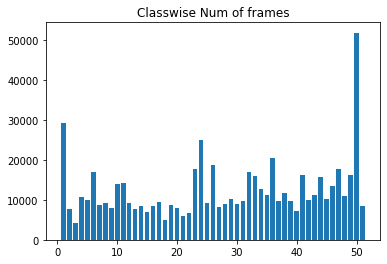

In [87]:
plt.title("Classwise Num of frames")
#plt.yscale("log")
plt.bar([i + 1 for i in range(51)], numf_classwise)

In [88]:
print("Mean: {}".format(statistics.mean(numf_classwise)))
print("Median: {}".format(statistics.median(numf_classwise)))

Mean: 12405.196078431372
Median: 9914


<BarContainer object of 51 artists>

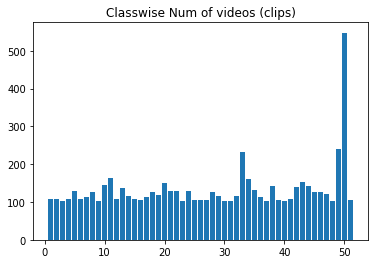

In [89]:
plt.title("Classwise Num of videos (clips)")
#plt.yscale("log")
plt.bar([i + 1 for i in range(51)], numv_classwise)

In [90]:
print("Mean: {}".format(statistics.mean(numv_classwise)))
print("Median: {}".format(statistics.median(numv_classwise)))

Mean: 132.66666666666666
Median: 116


<BarContainer object of 51 artists>

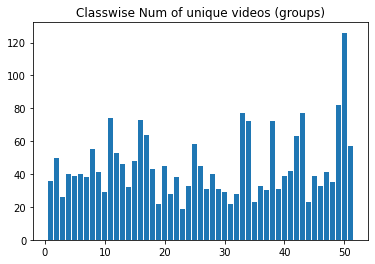

In [91]:
plt.title("Classwise Num of unique videos (groups)")
#plt.yscale("log")
plt.bar([i + 1 for i in range(51)], numuv_classwise)

In [92]:
print("Mean: {}".format(statistics.mean(numuv_classwise)))
print("Median: {}".format(statistics.median(numuv_classwise)))

Mean: 44.92156862745098
Median: 40
